
===== Birch–Murnaghan EOS Fit Results =====
V0       = 100.0097 ± 0.0127 Å³
B0       = 120.0288 ± 0.5104 GPa
B0'      = 4.0685 ± 0.1415


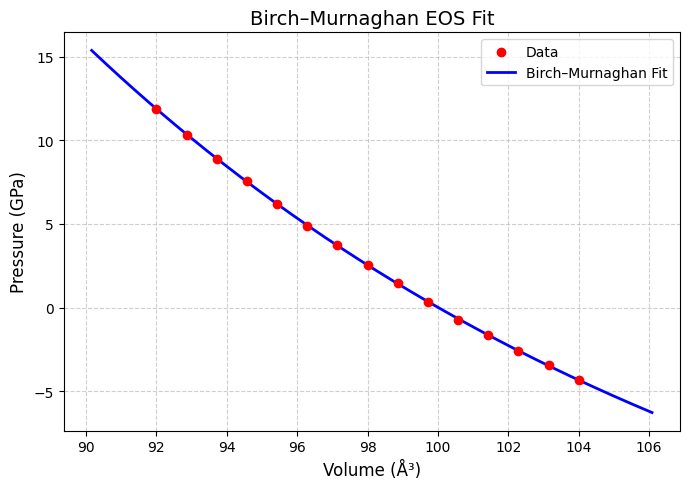

In [6]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def birch_murnaghan_pressure(V, V0, B0, B0_prime):
    """
    Third-order Birch-Murnaghan equation of state.
    """
    x = (V0 / V)**(2/3) 
    P = (3 * B0 / 2) * (x**(7/2) - x**(5/2)) * \
        (1 + (3/4) * (B0_prime - 4) * (x - 1))
    return P

# ==== Load P–V data ====
data = np.loadtxt("PvsV.dat") # PvsV.data file contains Volume in first Column and Pressure in second Column
volumes_data = data[:, 0]
pressures_data = data[:, 1]

# ==== Initial guesses ====
V0_guess = max(volumes_data)
B0_guess = 50.0
B0_prime_guess = 4.0

# ==== Fit ====
popt, pcov = curve_fit(
    birch_murnaghan_pressure,
    volumes_data,
    pressures_data,
    p0=[V0_guess, B0_guess, B0_prime_guess]
)

V0_fit, B0_fit, B0p_fit = popt
V0_err, B0_err, B0p_err = np.sqrt(np.diag(pcov))

# ==== Print fit results ====
print("\n===== Birch–Murnaghan EOS Fit Results =====")
print(f"V0       = {V0_fit:.4f} ± {V0_err:.4f} Å³")
print(f"B0       = {B0_fit:.4f} ± {B0_err:.4f} GPa")
print(f"B0'      = {B0p_fit:.4f} ± {B0p_err:.4f}")

# ==== Predict values ====
V_fit_curve = np.linspace(min(volumes_data)*0.98, max(volumes_data)*1.02, 200)
P_fit_curve = birch_murnaghan_pressure(V_fit_curve, V0_fit, B0_fit, B0p_fit)

# ==== Plot ====
plt.figure(figsize=(7,5))
plt.scatter(volumes_data, pressures_data, color='red', label='Data', zorder=3)
plt.plot(V_fit_curve, P_fit_curve, color='blue', lw=2, label='Birch–Murnaghan Fit')
plt.xlabel("Volume (Å³)", fontsize=12)
plt.ylabel("Pressure (GPa)", fontsize=12)
plt.title("Birch–Murnaghan EOS Fit", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
